In [179]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob

In [321]:
left_imgs = sorted(glob.glob('imgs/left/*.jpg'))[:16]
right_imgs = sorted(glob.glob('imgs/right/*.jpg'))[:16]

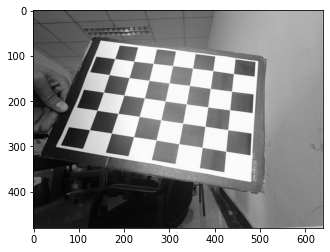

In [322]:
# visiualize one image
img_name = np.random.choice(left_imgs)
img_data = cv2.imread(img_name)
plt.imshow(img_data)
plt.show()

In [323]:
# detect the corner points

flag, corner_pts = cv2.findChessboardCorners(img_data, (5, 7))

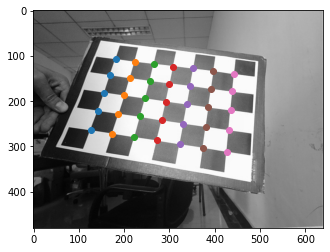

In [325]:
# visualize corner result
plt.imshow(img_data)
for i in range(9):
    plt.scatter(corner_pts[i * 5: (i + 1) * 5, 0, 0], corner_pts[i * 5: (i + 1) * 5, 0, 1])

In [326]:
# generate object points and calibrate camera
x = np.arange(7)
y = np.arange(5)
yy, xx = np.meshgrid(y, x)
obj_points = np.stack([xx, yy, np.zeros_like(xx)], axis=2)
obj_points = obj_points.reshape(-1, 1, 3).astype(np.float32)

In [327]:
h, w = img_data.shape[:2]

In [328]:
obj_points[:5]

array([[[0., 0., 0.]],

       [[0., 1., 0.]],

       [[0., 2., 0.]],

       [[0., 3., 0.]],

       [[0., 4., 0.]]], dtype=float32)

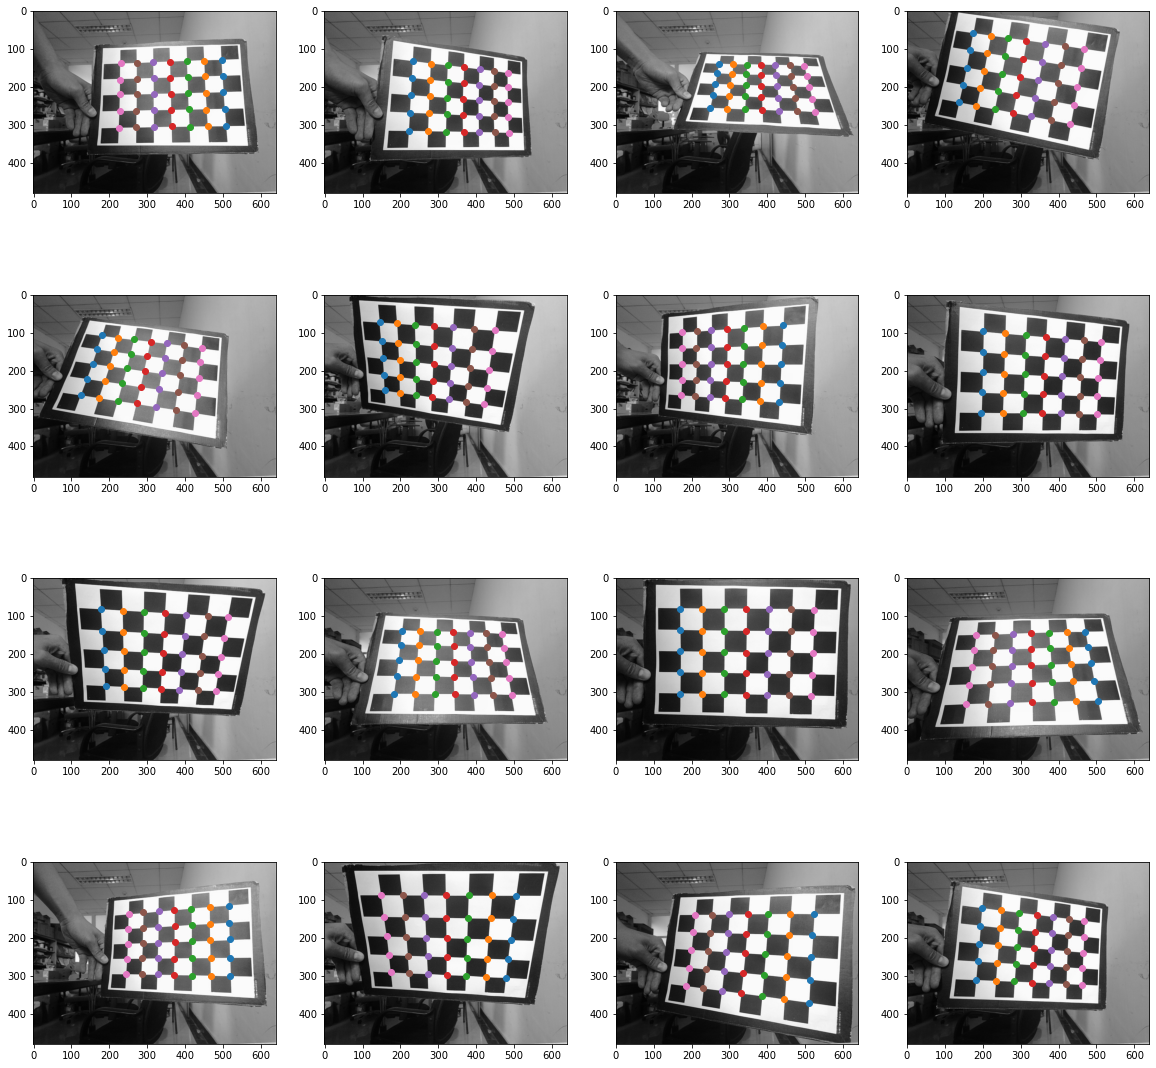

In [330]:
# get all image corner pts
img_pts = list()
obj_pts = list()
plt.figure(figsize=(20, 20))
for i, img_name in enumerate(left_imgs):
    img_data = cv2.imread(img_name)
    flag, corner_pts = cv2.findChessboardCorners(img_data, (5, 7))
    plt.subplot(4, 4, i + 1)
    plt.imshow(img_data)
    if not flag: continue
    for i in range(9):
        plt.scatter(corner_pts[i * 5: (i + 1) * 5, 0, 0], corner_pts[i * 5: (i + 1) * 5, 0, 1])
    
    img_pts.append(corner_pts)
    obj_pts.append(obj_points)

In [331]:
ret_val, matrix, dist_coff, rvec, tvec = cv2.calibrateCamera(np.array(obj_pts), np.array(img_pts), (w, h), None, None)

In [332]:
new_matrix, roi = cv2.getOptimalNewCameraMatrix(matrix, dist_coff, (w, h), 0, (w, h))

In [333]:
print(new_matrix, matrix, sep='\n')
print(dist_coff)
print(w, h)
print(roi)

[[478.25836182   0.         317.57192105]
 [  0.         464.40957642 252.08752914]
 [  0.           0.           1.        ]]
[[449.56829221   0.         325.59294993]
 [  0.         432.98601206 252.20774078]
 [  0.           0.           1.        ]]
[[ 0.10074793 -0.29249802  0.00358077 -0.01137368  0.37461944]]
640 480
(0, 0, 639, 479)


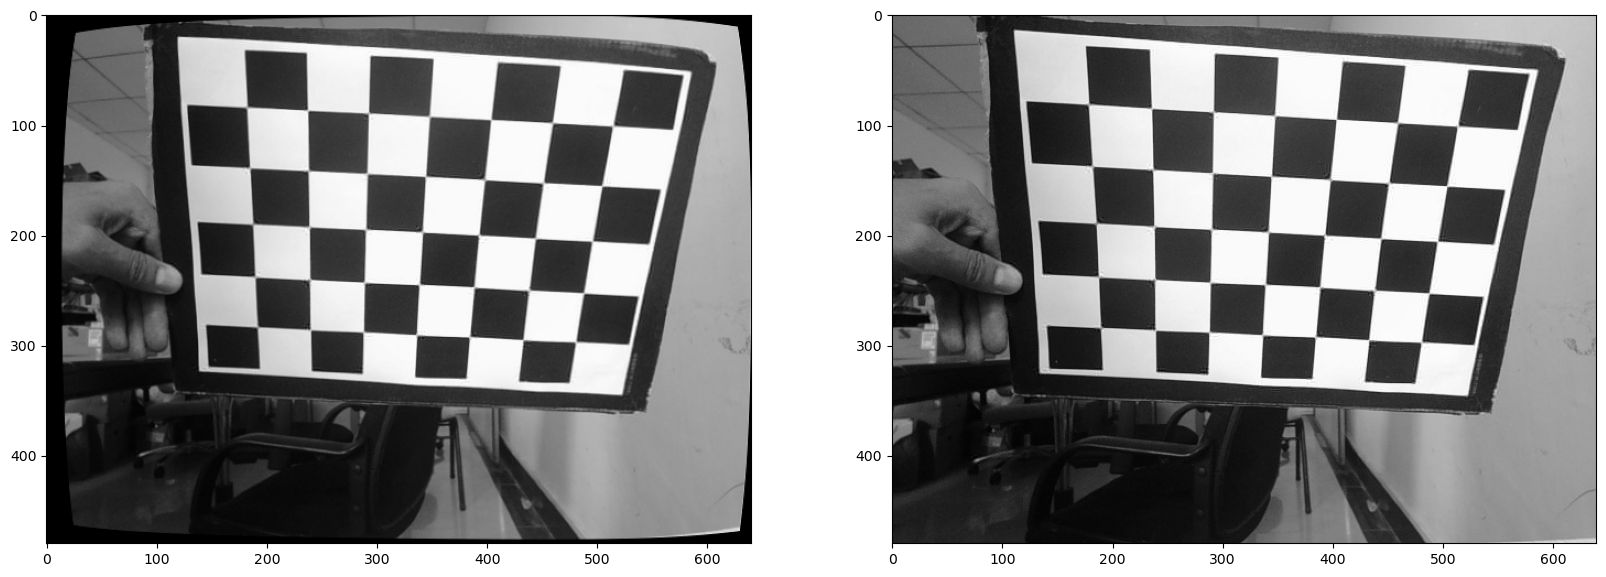

In [334]:
img_data = cv2.imread(np.random.choice(left_imgs))
undistored_image = cv2.undistort(img_data, matrix, dist_coff, new_matrix)
plt.figure(figsize=(20, 10), dpi=100)
plt.subplot(1, 2, 1)
plt.imshow(undistored_image)
plt.subplot(1, 2, 2)
plt.imshow(img_data)

In [337]:
# calibrate binocular camera
def calibrateCamera(img_names):
    # generate object points and calibrate camera
    x = np.arange(7)
    y = np.arange(5)
    yy, xx = np.meshgrid(y, x)
    obj_points = np.stack([xx, yy, np.zeros_like(xx)], axis=2)
    obj_points = obj_points.reshape(-1, 1, 3).astype(np.float32)
    
    # get all image corner pts
    img_pts = list()
    obj_pts = list()
    plt.figure(figsize=(20, 20))
    for i, img_name in enumerate(img_names):
        img_data = cv2.imread(img_name)
        flag, corner_pts = cv2.findChessboardCorners(img_data, (5, 7))
        plt.subplot(4, 4, i + 1)
        plt.imshow(img_data)
        if not flag: continue
        for i in range(9):
            plt.scatter(corner_pts[i * 5: (i + 1) * 5, 0, 0], corner_pts[i * 5: (i + 1) * 5, 0, 1])

        img_pts.append(corner_pts)
        obj_pts.append(obj_points)
    
    ret_val, matrix, dist_coff, rvec, tvec = cv2.calibrateCamera(np.array(obj_pts), np.array(img_pts), (w, h), None, None)
    
    return ret_val, matrix, dist_coff, img_pts, obj_pts

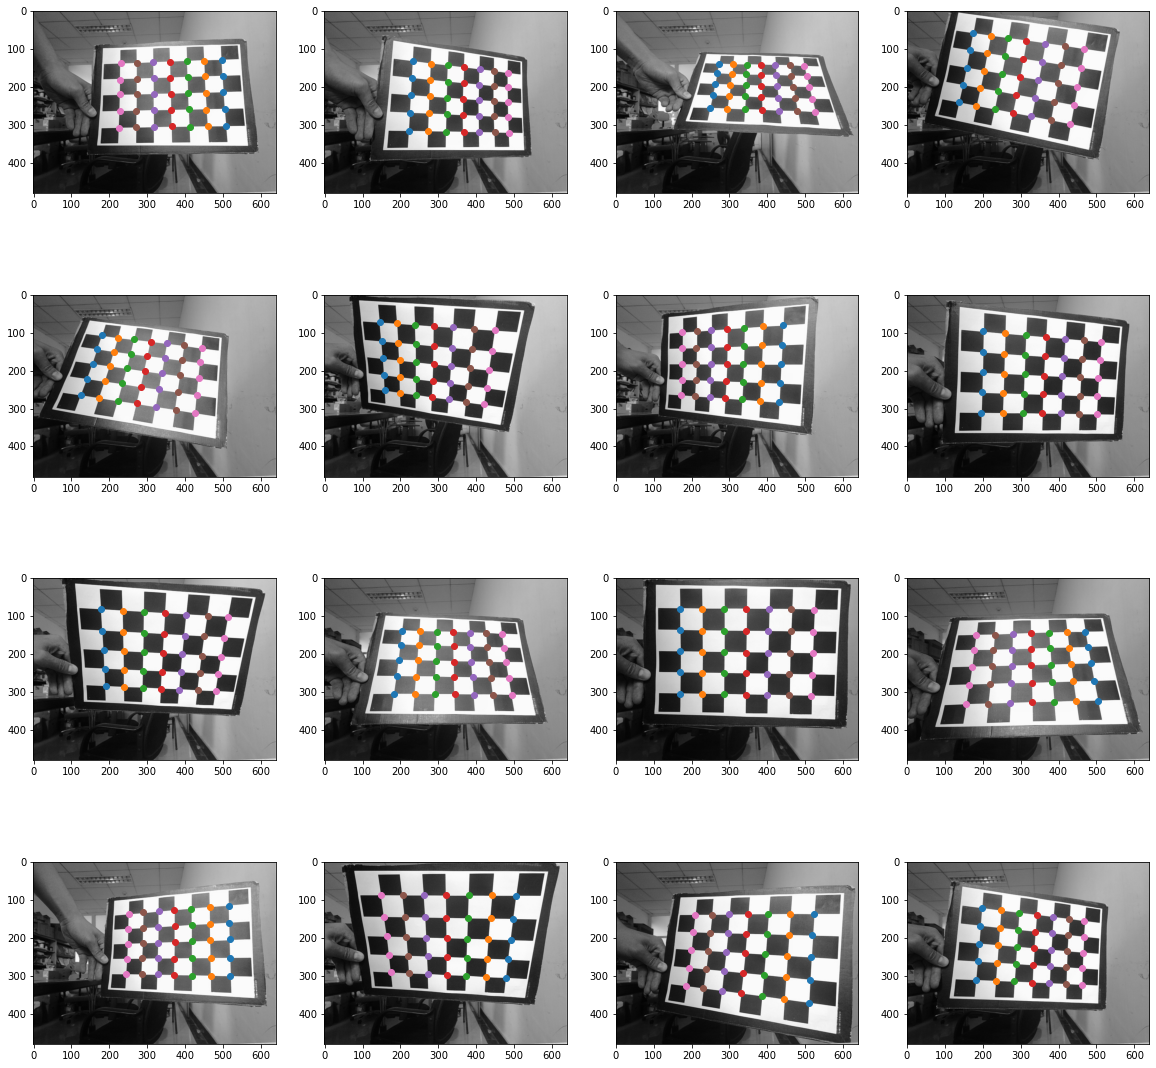

In [338]:
errleft, ml, dl, img_ptsl, obj_pts = calibrateCamera(left_imgs)

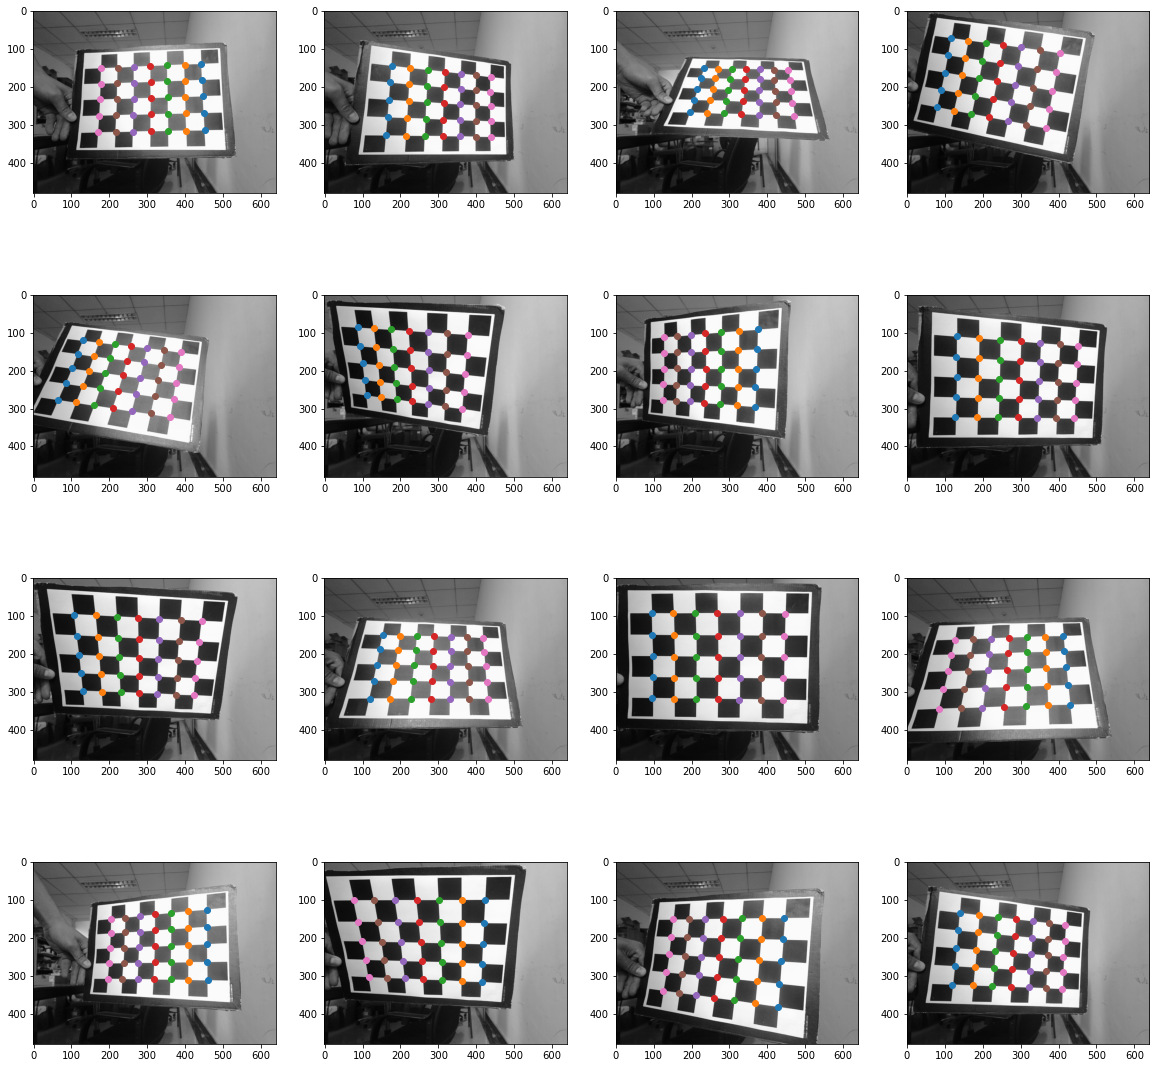

In [339]:
errright, mr, dr, img_ptsr, _ = calibrateCamera(right_imgs)

In [340]:
print(errleft, errright)
print(ml, mr, sep = '\n')
print(dl, dr, sep = '\n')

0.7605529905531792 0.6922153017185392
[[449.56829221   0.         325.59294993]
 [  0.         432.98601206 252.20774078]
 [  0.           0.           1.        ]]
[[451.96119198   0.         340.33381905]
 [  0.         435.89165622 259.46293345]
 [  0.           0.           1.        ]]
[[ 0.10074793 -0.29249802  0.00358077 -0.01137368  0.37461944]]
[[ 0.10387931 -0.24660673 -0.00184283 -0.01133938  0.23190581]]


In [341]:
# calibrate binocular camera
err, ml, dl, mr, dr, R, T, E, F = cv2.stereoCalibrate(obj_pts, img_ptsl, img_ptsr, ml, dl, mr, dr, (w, h), flags=cv2.CALIB_FIX_INTRINSIC)

In [342]:
print(R, T, sep='\n')

[[ 0.9998344   0.00450843  0.01763111]
 [-0.00469718  0.99993195  0.01067839]
 [-0.01758177 -0.01075944  0.99978754]]
[[-1.67187713e+00]
 [-1.13176853e-03]
 [ 1.27299333e-01]]


In [343]:
left_imgs

['imgs/left/left0.jpg',
 'imgs/left/left1.jpg',
 'imgs/left/left10.jpg',
 'imgs/left/left11.jpg',
 'imgs/left/left12.jpg',
 'imgs/left/left13.jpg',
 'imgs/left/left14.jpg',
 'imgs/left/left15.jpg',
 'imgs/left/left16.jpg',
 'imgs/left/left17.jpg',
 'imgs/left/left18.jpg',
 'imgs/left/left19.jpg',
 'imgs/left/left2.jpg',
 'imgs/left/left20.jpg',
 'imgs/left/left21.jpg',
 'imgs/left/left22.jpg']

In [344]:
right_imgs

['imgs/right/right0.jpg',
 'imgs/right/right1.jpg',
 'imgs/right/right10.jpg',
 'imgs/right/right11.jpg',
 'imgs/right/right12.jpg',
 'imgs/right/right13.jpg',
 'imgs/right/right14.jpg',
 'imgs/right/right15.jpg',
 'imgs/right/right16.jpg',
 'imgs/right/right17.jpg',
 'imgs/right/right18.jpg',
 'imgs/right/right19.jpg',
 'imgs/right/right2.jpg',
 'imgs/right/right20.jpg',
 'imgs/right/right21.jpg',
 'imgs/right/right22.jpg']

In [345]:
# stereo rectify

Rl, Rr, Pl, Pr, Q, Roil, Roir = cv2.stereoRectify(ml, dl, mr, dr, (w, h), R, T)

In [346]:
idx = np.random.choice(np.arange(4))
left_img = cv2.imread(left_imgs[idx])
right_img = cv2.imread(right_imgs[idx])

In [347]:
ml, Pl

(array([[449.56829221,   0.        , 325.59294993],
        [  0.        , 432.98601206, 252.20774078],
        [  0.        ,   0.        ,   1.        ]]),
 array([[434.43883414,   0.        , 366.89863968,   0.        ],
        [  0.        , 434.43883414, 254.24496078,   0.        ],
        [  0.        ,   0.        ,   1.        ,   0.        ]]))

In [348]:
lmapx, lmapy = cv2.initUndistortRectifyMap(ml, dl, Rl, Pl[:,:3], (w, h), cv2.CV_32FC1)
rmapx, rmapy = cv2.initUndistortRectifyMap(mr, dr, Rr, Pr[:,:3], (w, h), cv2.CV_32FC1)

nleft = cv2.remap(left_img, lmapx, lmapy, cv2.INTER_LINEAR)
nright = cv2.remap(right_img, rmapx, rmapy, cv2.INTER_LINEAR)

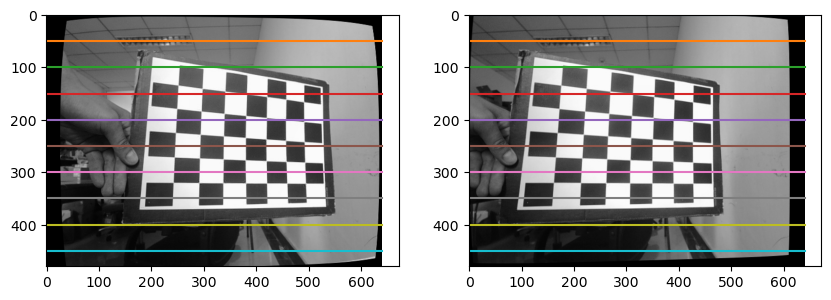

In [349]:
plt.figure(figsize=(10, 5), dpi=100)
plt.subplot(1, 2, 1)
plt.imshow(nleft)

# plot line
for i in range(0, h, 50):
    plt.plot([0, 640], [i, i])
    

plt.subplot(1, 2, 2)
plt.imshow(nright)

# plot line
for i in range(0, h, 50):
    plt.plot([0, 640], [i, i])